In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

            prcp
date            
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
2016-08-28  0.01
...          ...
2017-08-19  0.09
2017-08-20   NaN
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[2223 rows x 1 columns]


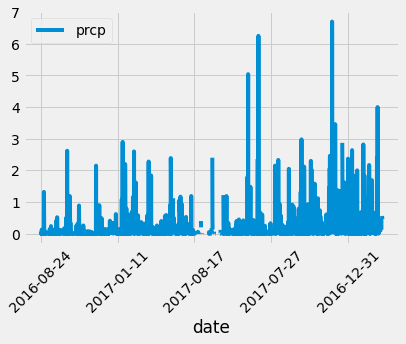

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lateststr = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
latestdate = dt.datetime.strptime(lateststr, "%Y-%m-%d")
 
#Calculate the date 1 year ago from the last data point in the database
prioryear = latestdate - dt.timedelta(365)

# Perform a query to retrieve the date and precipitation scores
result = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= prioryear).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(result).set_index("date")
print(df)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45)
plt.savefig("prcp.png")

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [35]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).count()

9

In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
 session.query(Measurement.station,func.count()).group_by(Measurement.station).order_by(func.count().desc()).first()       

('USC00519281', 2772)

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
result1 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station == "USC00519281").all()
result1

[(54.0, 85.0, 71.66378066378067)]

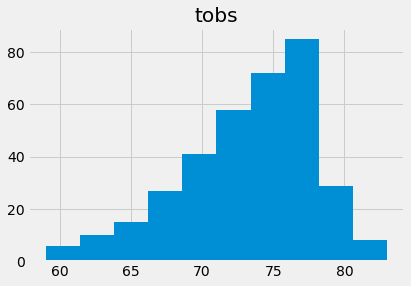

<Figure size 432x288 with 0 Axes>

In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result2 = session.query(Measurement.tobs).filter((Measurement.date >= prioryear) & (Measurement.station == "USC00519281")).all()
pd.DataFrame(result2).hist()
plt.show()
plt.savefig("hist.png")